# 보스턴 주택 가격 예측

In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split



## EDA

In [66]:
import pandas as pd

boston = pd.read_csv('./data/Boston_house.csv')
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [67]:
boston.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170,22.532806
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994,9.197104
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000,5.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000,17.025000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000,21.200000
75%,94.075000,396.225000,6.623500,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000,25.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000,50.000000


In [68]:
for col in boston.columns:
    print(col,",",len(boston[col].unique()))

AGE , 356
B , 357
RM , 446
CRIM , 504
DIS , 412
INDUS , 76
LSTAT , 455
NOX , 81
PTRATIO , 46
RAD , 9
ZN , 26
TAX , 66
CHAS , 2
Target , 229


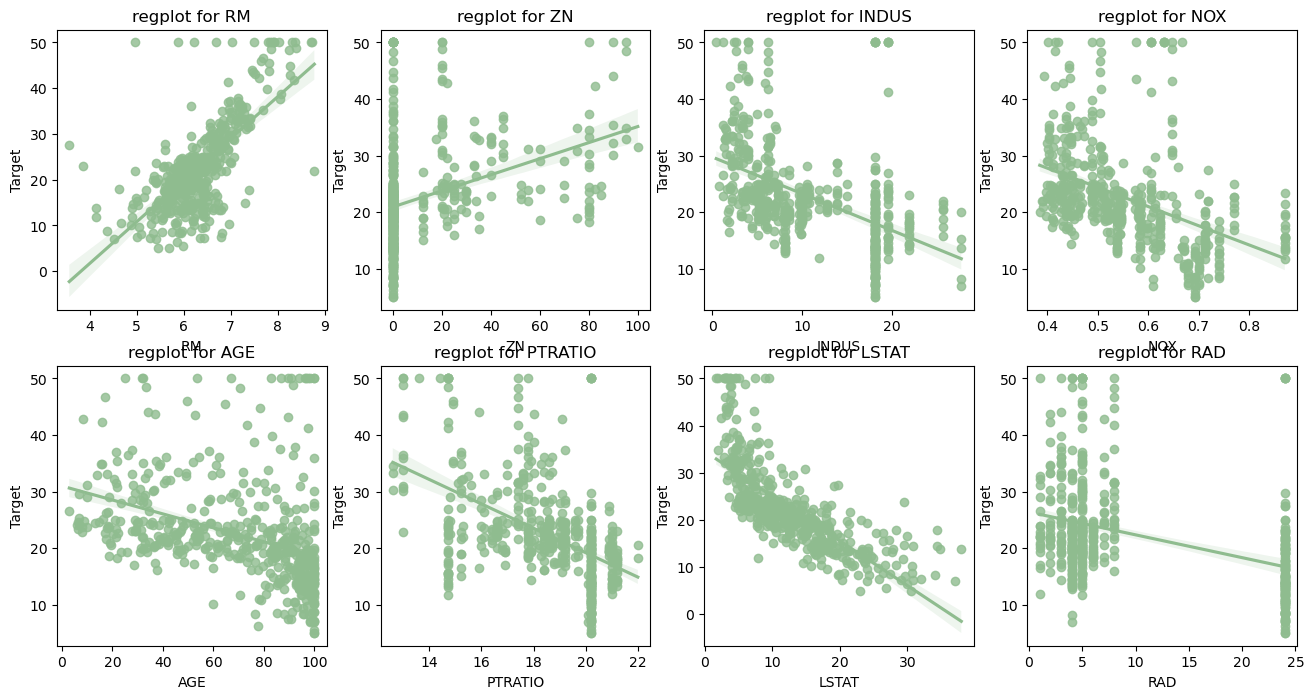

<Figure size 640x480 with 0 Axes>

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=4, nrows=2, figsize = (16,8))

lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i,col in enumerate(lm_features):
    # 서브플랏 위치 지정
    row_index = int(i/4)
    col_index = int(i%4)

    sns.regplot(y = boston['Target'],x = boston[col], color = 'darkseagreen', ax = ax[row_index,col_index])
    ax[row_index,col_index].set_title('regplot for %s' % col)
plt.show()

# 레이아웃 조정
plt.tight_layout(pad=5)
plt.subplots_adjust(wspace=0, hspace=5)

## 머신러닝

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()

X = boston.drop('Target',axis=1,inplace=False)
y = boston['Target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=156)

model.fit(X_train,y_train)
pred = model.predict(X_test)
lr_test = model.score(X_test, y_test)
mse = mean_squared_error(pred,y_test)
rmse = np.sqrt(mse)

print('MSE: {0: .3f}, RMSE : {1: .3f}'.format(mse,rmse))
print('Variance score : {0: .3f}'.format(r2_score(y_test,pred)))



MSE:  17.297, RMSE :  4.159
Variance score :  0.757


In [71]:
print('절편 값: ',model.intercept_)
print('회귀 계수값: ', np.round(model.coef_, 1))

절편 값:  40.99559517216473
회귀 계수값:  [  0.    0.    3.4  -0.1  -1.7   0.   -0.6 -19.8  -0.9   0.4   0.1  -0.
   3. ]


In [72]:
coeff = pd.Series(data=np.round(model.coef_,1),index=X.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
AGE         0.0
B           0.0
INDUS       0.0
TAX        -0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

### 규제 선형회귀

#### Ridge (L2)

In [73]:
boston = pd.read_csv('./data/Boston_house.csv')
X_data = boston.drop('Target',axis=1,inplace=False)
y_target = boston['Target']

X_train, X_test, y_train, y_test = train_test_split(X_data,y_target,test_size=0.3, random_state=156)

* Ridge - Lasso 비교

In [74]:
import numpy as np

# linspace() : -10에서 10까지의 범위 안에서 100개 추출
rng = np.linspace(-10,10,100)       # rng: 실제 데이터 값들
# len(rng)

mse = (0.5 * (rng-3)) ** 2 + 30     # 임의의 모델이 갖는 mse(임의 지정)
# mse

# L2 규제

l2 = rng**2

l1 = 5 * np.abs(rng)

# ridge, lasso 계산 -> 경사하강법
ridge = mse + l2
lasso = mse + l1

<function matplotlib.pyplot.legend(*args, **kwargs)>

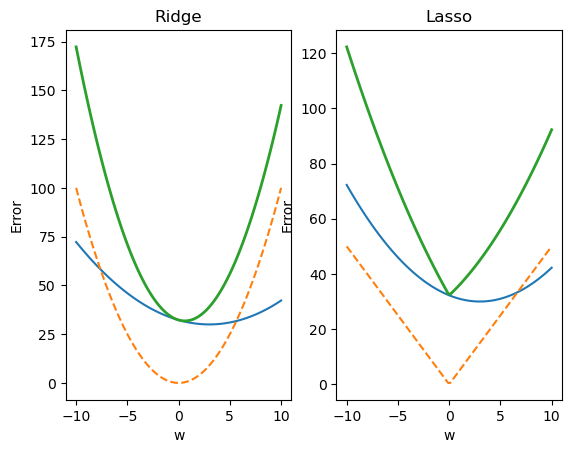

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1,2,1)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l2,'--',label='L2')
plt.plot(rng,ridge, lw=2, label='Ridge')
plt.xlabel('w'); plt.ylabel('Error')
plt.title('Ridge')
plt.legend

plt.subplot(1,2,2)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l1,'--',label='L1')
plt.plot(rng,lasso, lw=2, label='Lasso')
plt.xlabel('w'); plt.ylabel('Error')
plt.title('Lasso')
plt.legend

# Ridge의 경우 완만한 곡선을, Lasso의 경우 보다 급격하게 직선에 가까운 그래프를 보여주어 Lasso가 더 과격하게 규제를 건다는 것을 알 수 있다.

* Ridge

In [76]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

y_target = boston['Target']
X_data = boston.drop('Target',axis=1,inplace=False)

ridge  = Ridge(alpha=10)        # 디폴트 세팅

neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error',cv=5)    # neg_ : -(mean_squared_error)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores,3))
print(' 5 folds 의 개별 RMSE scores: ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE: ', np.round(avg_rmse,3))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE:  5.518


In [77]:

alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    neg_mean_scores = cross_val_score(ridge, X_data, y_target,scoring='neg_mean_squared_error')
    avg_rmse = np.mean(np.sqrt(-1 * neg_mean_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.788
alpha 1 일 때 5 folds의 평균 RMSE : 5.653
alpha 10 일 때 5 folds의 평균 RMSE : 5.518
alpha 100 일 때 5 folds의 평균 RMSE : 5.330


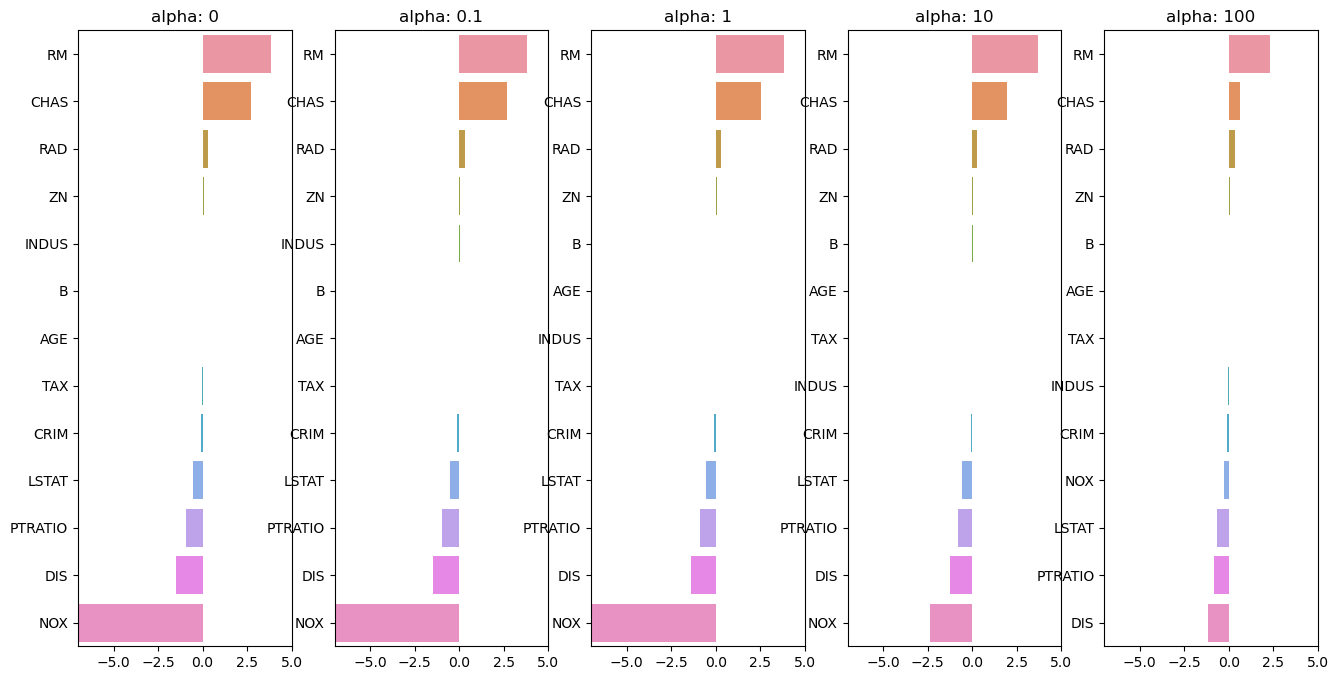

In [78]:
fig, axs = plt.subplots(figsize=(16,8), nrows=1, ncols=5)

coeff_df = pd.DataFrame()
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data,y_target)
    
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha: ' + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-7,5)    
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()
    

In [79]:
sort_columns = 'alpha: ' + str(alphas[0])
coeff_df.sort_values(by=sort_columns, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


#### Lasso (L1)

In [80]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    
    if verbose : print('##########', model_name, '##########')
    
    for param in params:
        if model_name == 'Ridge' : model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
    
        neg_mean_scores = cross_val_score(model, X_data_n, y_target_n,scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mean_scores))
        print('alpha {0}일 때 5폴드 세트의 평균 RMSE : {1: .3f}'.format(param, avg_rmse))

        model.fit(X_data_n, y_target_n)
                
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha:' + str(param)
            print(colname)
            coeff_df[colname] = coeff
    return coeff_df

In [81]:
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

########## Lasso ##########
alpha 0.07일 때 5폴드 세트의 평균 RMSE :  5.612
alpha:0.07
alpha 0.1일 때 5폴드 세트의 평균 RMSE :  5.615
alpha:0.1
alpha 0.5일 때 5폴드 세트의 평균 RMSE :  5.669
alpha:0.5
alpha 1일 때 5폴드 세트의 평균 RMSE :  5.776
alpha:1
alpha 3일 때 5폴드 세트의 평균 RMSE :  6.189
alpha:3


In [82]:
coeff_lasso_df

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
AGE,-0.011708,-0.010039,0.003601,0.020909,0.042504
B,0.010248,0.010249,0.009468,0.008247,0.006510
RM,3.789730,3.703192,2.498176,0.949782,0.000000
CRIM,-0.098196,-0.097900,-0.083293,-0.063444,-0.000000
DIS,-1.176674,-1.160630,-0.936779,-0.668912,-0.000000
INDUS,-0.042124,-0.036620,-0.005258,-0.000000,-0.000000
LSTAT,-0.560427,-0.568765,-0.656287,-0.761110,-0.807680
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
PTRATIO,-0.765071,-0.770621,-0.758687,-0.722897,-0.264982
RAD,0.270932,0.274717,0.277443,0.264221,0.061898


In [83]:
sort_columns = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_columns, ascending=False)


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789730,3.703192,2.498176,0.949782,0.000000
CHAS,1.434346,0.955172,0.000000,0.000000,0.000000
RAD,0.270932,0.274717,0.277443,0.264221,0.061898
ZN,0.049065,0.049218,0.049556,0.049180,0.037248
B,0.010248,0.010249,0.009468,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011708,-0.010039,0.003601,0.020909,0.042504
TAX,-0.014290,-0.014571,-0.015442,-0.015213,-0.008604
INDUS,-0.042124,-0.036620,-0.005258,-0.000000,-0.000000
CRIM,-0.098196,-0.097900,-0.083293,-0.063444,-0.000000


* ElasticNet : 추가로 해보기

In [ ]:
# elasticNet은 (1-alpha)/2 * Ridge의 L2 정규화+ alpha * Lasso의 L1 정규화

In [88]:
import numpy as np

# linspace() : -10에서 10까지의 범위 안에서 100개 추출
rng = np.linspace(-10,10,100)       # rng: 실제 데이터 값들
# len(rng)

mse = (0.5 * (rng-3)) ** 2 + 30     # 임의의 모델이 갖는 mse(임의 지정)
# mse

# L2 규제
l2 = rng**2

# l1 규제
l1 = 5 * np.abs(rng)

# ridge, lasso 계산 -> 경사하강법
ridge = mse + l2
lasso = mse + l1
elasticNet = mse + (((1-alpha)/2 * l2) + alpha * l2)

<function matplotlib.pyplot.legend(*args, **kwargs)>

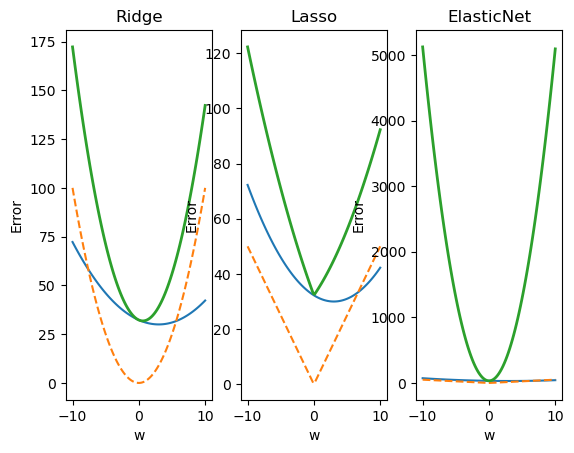

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1,3,1)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l2,'--',label='L2')
plt.plot(rng,ridge, lw=2, label='Ridge')
plt.xlabel('w'); plt.ylabel('Error')
plt.title('Ridge')
plt.legend

plt.subplot(1,3,2)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l1,'--',label='L1')
plt.plot(rng,lasso, lw=2, label='Lasso')
plt.xlabel('w'); plt.ylabel('Error')
plt.title('Lasso')
plt.legend

plt.subplot(1,3,3)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l1,'--',label='L1')
plt.plot(rng,elasticNet, lw=2, label='elasticNet')
plt.xlabel('w'); plt.ylabel('Error')
plt.title('ElasticNet')
plt.legend
# Ridge의 경우 완만한 곡선을, Lasso의 경우 보다 급격하게 직선에 가까운 그래프를 보여주어 Lasso가 더 과격하게 규제를 건다는 것을 알 수 있다.